In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, shapiro
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
A=pd.read_csv('car_sales.csv',index_col=0)

In [4]:
A['Price'].describe()

count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64

In [5]:
shapiro(A['Price']) # returns t-stat and p-value

(0.8805127143859863, 4.2348321471763484e-07)

In [6]:
# Shapiro test is used to check the normality hence here,
# H0 => A['price'] is normal
# H1 => Not Normally distributed

In [7]:
# here p-value < 0.05 means reject null hypo. means data is not normal
# so we need to apply transformation

In [8]:
import copy
B = copy.deepcopy(A)

In [9]:
A['Price'][:2]

1    15.9
2    33.9
Name: Price, dtype: float64

In [10]:
np.log(A['Price'][:2])

1    2.766319
2    3.523415
Name: Price, dtype: float64

In [11]:
np.exp(2.766319)

15.899998263303743

In [12]:
B['Price']=np.log(A['Price'])  # natural log

In [13]:
B['Price'].describe()

count    93.000000
mean      2.865452
std       0.454686
min       2.001480
25%       2.501436
50%       2.873565
75%       3.148453
max       4.125520
Name: Price, dtype: float64

In [14]:
shapiro(B['Price'])

(0.9841008186340332, 0.3199950158596039)

In [15]:
# Now p-value > 0.05 means failed to reject null hypo, and now data follows normality

In [16]:
# One sample test: Aim is to check whether the sample is true representation of population or not.
# Randomly picking 30 samples
# so we willcheck if sample mean is true representation of pop mean.

In [17]:
import random
samp_data = random.sample(B['Price'].values.tolist(),30)

In [18]:
type(samp_data)

list

In [19]:
m=np.mean(samp_data)

In [20]:
# So sample mean is 2.78 and population mean is 2.86

In [21]:
s=np.std(samp_data)

In [22]:
tdata = (m-2.865452)/(s/np.sqrt(30))
tdata

1.0707597918618308

In [23]:
# since tstat is lying within the range of -1.96 to 1.96
# And its two tail test , so map the tstat value on both sides of graph. and see the value, interval
# means our sample mean is lying in accepted area or within the confidence interval
# failed to reject null hypo

In [24]:
# expected value = popul mean
t_stat,p_value = ttest_1samp(samp_data,2.865452) # here we provide sample data and expected mean value
print(t_stat,p_value)

1.052762547208878 0.30114307639085314


In [25]:
zstat, p_value = wilcoxon(np.array(samp_data)-3.95)
print(p_value)

1.732216233144114e-06


In [27]:
age=np.array([24,25,24,23,24,25])
np.mean(age)
print('shapiro',shapiro(age))

shapiro (0.8662614226341248, 0.2117050290107727)


In [28]:
# hence data is normal (p-value>0.05)
# H0 => mean of age = 25
t_stat,p_value = ttest_1samp(age,25)
print(p_value)

0.04219399670552458


In [29]:
# means null hypo is wrong. lets check for 24. => it holds good

In [30]:
l=np.array([24,25,24,23,24,25,30])
print('shapiro',shapiro(l))

shapiro (0.7217678427696228, 0.0063759502954781055)


In [31]:
# means data is not normal because of outlier 30. 
t_stat,p_value = ttest_1samp(l,24)
print(p_value)
# but still p-value satisfies that this sample age is true representation of entire class' age

0.29557245162157736


In [32]:
zstat, p_value = wilcoxon(np.array(l)-24) # For applying wilcoxon , data needs to be np.array
print(p_value)

0.25683925795785656


C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [33]:
# p-value using wilcoxon is actual( coz data is not normal) but is less than ttest_1samp.
# because, wilccoxon is pulling boundary..lessening our confidence to make judgement.

In [34]:
# calculating power of test
# computing difference in means of sample and popul and diving by std dev
# set no,. of observations , alpha value, alternative values, two sided, larger, smaller

(np.mean(samp_data)-2.5)/np.std(samp_data)

0.9704122287506958

In [35]:
print(ttest_power(0.5,nobs=30,alpha=0.5,alternative='two-sided')) # nobs-no. of observation

0.9803078648072069


In [ ]:
# as sample size increase, power increase.

# Two Sample Test

In [ ]:
# Lets say 2 samples present. And we need to check variance of both.
# H0: S1^2 = S2^2
# to check this, there are 2 tests
# If data follows normality, leven test. If not normal -> Bartlet test(is prefered, even if one of them is not normal)

In [36]:
# If data set is similar and performong two test before and after then its Paired test otherwise two sample test.
# Paired is dependent while Unpaired is independent test

In [57]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, bartlett, shapiro, wilcoxon
from statsmodels.stats.power import ttest_power
import pandas as pd

In [2]:
A=pd.read_table('HR.txt',index_col=0)

In [4]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# H0: Monthly income of male = female

In [3]:
A_gender=A.groupby('Gender')
A1=A_gender.get_group(1) # male
A2=A_gender.get_group(2) # female

In [11]:
# Unpaired test
g1=A1['MonthlyIncome']
g2=A2['MonthlyIncome']

In [12]:
# check for normality
shapiro(g1)

(0.8169718384742737, 1.709933327621381e-30)

In [13]:
shapiro(g2)

(0.8416616916656494, 9.378564564919968e-24)

In [14]:
# Both groups are not normal (p-value< 0.05) hence use non-parametric test(bartlett test)

In [15]:
bartlett(g1,g2)

BartlettResult(statistic=0.01177553932613755, pvalue=0.9135870578638189)

In [16]:
# high p-value. Use mannwhitneyu test
u_stat,p_val = mannwhitneyu(g1,g2)
print(p_val)

0.044208341633010594


In [ ]:
#rejecting null hypo but its very marginal diff from 0.05. So cant conclude confidently, lets see power of test

In [18]:
n1=len(g1)
n2=len(g2)

In [48]:
delta=(np.mean(g1) - np.mean(g2)) / np.sqrt(((n1-1)*np.var(g1)+(n2-1)*np.var(g2)) / n1+n2-2)
delta

-0.05043216946192664

In [49]:
print(ttest_power(delta, nobs=n1+n2, alpha=0.05, alternative='two-sided'))

0.48902844548798985


In [50]:
# since we are reject null hypo at a boundary so , power percent is just 48 %
# conclusion- We are rejecting null hypo. So there is diff between male n female avg salary but its very marginal.

In [51]:
# Lets check for Age
# H0: Avg age of male = female

In [52]:
# creating 2 groups which are indep hence unpaired test. 
Age1=A1['Age']
Age2=A2['Age']
# checking normality of both groups

In [53]:
shapiro(Age1)

(0.9764998555183411, 1.0052821075579033e-10)

In [54]:
shapiro(Age2)

(0.9777933955192566, 8.791240446726079e-08)

In [55]:
# None of the 2 groups data is normal. Normality fails hence going with bartlett test

In [56]:
bartlett(Age1,Age2)

BartlettResult(statistic=0.4220122362875722, pvalue=0.5159346814723328)

In [57]:
# but variance of both groups is similar. (coz p-value>0.05)

In [58]:
m_stat,p_value = mannwhitneyu(Age1,Age2)
print(p_value)

0.08331979343883855


In [59]:
# failed to reject null hypo implies Averaghe age of male is ALMOST similar to avg age of female
# lets confirm by checkig power of test

In [60]:
n1=len(Age1)
n2=len(Age2)

In [61]:
d = (np.mean(Age1) - np.mean(Age2)) / np.sqrt(((n1-1)*np.var(Age1)+(n2-1)*np.var(Age2)) / n1+n2-2)
d

-0.025144868164309934

In [62]:
print(ttest_power(d, nobs=n1+n2, alpha=0.05, alternative='two-sided'))

0.16122862095345783


In [63]:
# hence we are only 16 % sure about the test means there is slight difference between average age of 2 groups

In [64]:
Age1.mean()

36.6530612244898

In [65]:
Age2.mean()

37.32993197278912

In [1]:
# check for normality of two groups using shapiro or anderson(group size>5000) accordingly.
# if both groups are normal, use levene test followed by ttest_1samp or ttest_ind
# if one of the groups is not normal, use bartlett test which punished the data.
# and then ttest_ind  or ttest_1samp (if bartlett is giving high p value)
# even after the bartlett punishment, (bartlett pvalue result<0.05) we need to punish again by mannwhitneyu test.

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

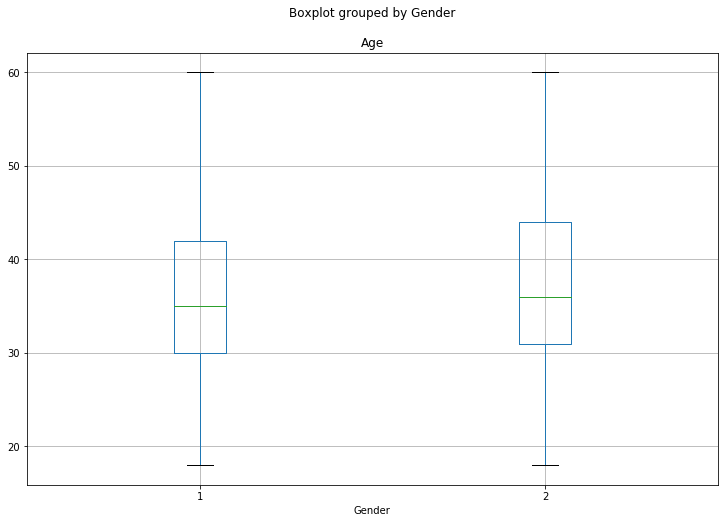

In [43]:
A.boxplot(column='Age',by ='Gender',figsize=(12,8))
plt.show()

# Normal Distribution Problems

In [68]:
#To find area under the curve, first of all we need to find the z-score and we need cumulative function.
#e.g food packet mean wt is 125 gm , SD = 15.5 what is chance that customer get a packet of (<100 gm) and (>135 gm)
# => here probability(x<100) is asked. so firstly converting it to the z scale.
z = (100-125)/15.5 
z

-1.6129032258064515

In [69]:
# calculate probability, area under curve in std normal distribution.
import scipy.stats as stats

In [70]:
stats.norm.cdf(z)

0.05338276713404089

In [71]:
# it shows we have 5.3 % chance that we get packet (< 100 gm)

In [74]:
# calculating upper limit 
z1 = (135-125)/15.5 
z1

0.6451612903225806

In [75]:
1- stats.norm.cdf(z1) # we are calculating right side area. Coz python always calcaultes left portion area.

0.25941133433509533

In [76]:
# it shows we have 25.9 % chanve of getting packet (> 135gm)

In [92]:
# Storytelling:
# 1. Compared to underweight packets there are more chances to get overweight packets
# 2. producer's risk is more than the consumer's risk
# 3. Stop the productoin and calibrate the machine

In [93]:
#  find a prob to pick a packet (>123 gm) and (<128 gm)

In [94]:
z=(123-125)/15.5
z

-0.12903225806451613

In [95]:
Area1 = stats.norm.cdf(z)
Area1

0.448666061968402

In [96]:
z1=(128-125)/15.5
z1

0.1935483870967742

In [97]:
Area2 = stats.norm.cdf(z1)
Area2

0.5767352425179979

In [98]:
# so area under the curve ( here shaded area is middle portion)
Output = Area2 - Area1
Output

0.12806918054959593

In [99]:
#Story: there is very less (12.8 %) chances that u will get perfectly weighed packet(123 to 128 gm) 

# Z test for Proportion

Crosstab table of categorical variable is called contingency table.(marginal distribution)
e.g 2 columns gender wise ( male and female )
under it row wise distribution of Attrition
so crosstab analysis gives how many male members have left the organisation and how many female members.

For proportionality test we need this cross tab table .

For categorical data, it is either binomial (1 or 0) or poisson distribution. 
And for continuos data, there is term called normal distribution.

Ho: Proportion of male employee leaving org = Prop of female employee leaving org
H1: Not equal.

Here we need z data. However, In case of continuous variables, we check normality and then t data value.


In [2]:
from scipy.stats import norm
import pandas as pd
import numpy as np

In [3]:
A = pd.read_table('HR.txt',index_col = 0)

In [4]:
CT = pd.crosstab(A['Attrition'],A['Gender'])
CT

Gender,1,2
Attrition,,
No,732,501
Yes,150,87


In [5]:
n1 = CT.iloc[:,0].sum()
n2 = CT.iloc[:,1].sum()
x1 = CT.iloc[1,0]
x2 = CT.iloc[1,1]

In [6]:
# calculating p pooled
pp = (x1+x2)/(n1+n2)
pp

0.16122448979591836

In [7]:
p1 = x1/n1
p2 = x2/n2

In [8]:
zdata = (p1-p2)/np.sqrt((pp * (1-pp) * ((1/n1) +(1/n2))))
zdata

1.1292547809155016

In [9]:
# hence 1.129 on both sides is lying in our acceptance region (+-1.96) 
# so accepting null hypo implies there is no significant diff between male attrition rate and female attrition rate.

In [10]:
# its two tailed test so multiplying by 2 to get area of shaded region.(shaded region is on both sides)
# lets confirm using p-value
pval = 2*(1-norm.cdf(abs(zdata)))
pval

0.2587903704911598

In [11]:
# p-value is greater than 0.05, so p-value also confirms us that we failed to reject null hypo

In [16]:
z,p=twosampz(x1,x2,n1,n2)

In [17]:
print(z)

1.129


In [18]:
print(p)

0.2588


In [22]:
M = pd.read_csv('Migraine.csv',index_col = 0 )

In [23]:
M.columns

Index(['id', 'time', 'dos', 'hatype', 'age', 'airq', 'medication', 'headache',
       'Gender'],
      dtype='object')

In [24]:
M.head()

,id,time,dos,hatype,age,airq,medication,headache,Gender
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [30]:
M['headache'].value_counts()

yes    2666
no     1486
Name: headache, dtype: int64

In [29]:
# Q. Check whether proportion of headache among male and female is similar or statistically different.

In [31]:
# both are categorical var. hence need to perform proportion test.
# creating crosstab of gender and headache.
ctab = pd.crosstab(M['headache'],M['Gender'])
ctab

Gender,female,male
headache,,
no,1266,220
yes,2279,387


In [42]:
# H0: Male headache proportion = female headache proportion
# H1: difference in proportions.

In [37]:
# creating variables, n1,n2 and computing x1,x2
n1 = ctab.loc[:,'female'].sum()
n2 = ctab.loc[:,'male'].sum()
x1 = ctab.iloc[1,0]
x2 = ctab.iloc[1,1]

In [40]:
def twosampz(x1,x2,n1,n2):
    p1 = x1/n1 # proportion of female patients having headache
    p2 = x2/n2 # proportion of male patients having headache
    pp = (x1+x2)/(n1+n2)
    zdata = (p1-p2)/np.sqrt((pp * (1-pp) * ((1/n1) +(1/n2))))
    pval = 2*(1-norm.cdf(abs(zdata)))
    return round(zdata,3),round(pval,4)

In [41]:
twosampz(x1,x2,n1,n2)

(0.252, 0.8007)

In [43]:
# hence High p_value (p-value > 0.05), failed to reject null hypo.
# implies proportion of male of female patients having headache is more or less same. (significantly, almost)

In [44]:
# Q. load heart dataset and check proportion of male n female having heart disease is same or not.

In [45]:
H = pd.read_csv('heart.csv')
H.head()

,age,gender,chest_pain,blood_pressure,cholestoral,blood_sugar,ecg,heart_rate,exercise,oldpeak,slope,vessels,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [59]:
H['disease'].value_counts() # let's say 1: Non-Heart disease. 2:Heart disease

1    150
2    120
Name: disease, dtype: int64

In [47]:
ct = pd.crosstab(H['disease'],H['gender'])
ct # lets say 0:male 1:female

gender,0,1
disease,,
1,67,83
2,20,100


In [60]:
n1 = ct.iloc[:,0].sum()
n2 = ct.iloc[:,1].sum()
x1 = ct.iloc[1,0]
x2 = ct.iloc[1,1]

In [61]:
def twosampz(x1,x2,n1,n2):
    p1 = x1/n1 # proportion of female patients having headache
    p2 = x2/n2 # proportion of male patients having headache
    pp = (x1+x2)/(n1+n2)
    zdata = (p1-p2)/np.sqrt((pp * (1-pp) * ((1/n1) +(1/n2))))
    pval = 2*(1-norm.cdf(abs(zdata)))
    return round(zdata,3),round(pval,4)

In [62]:
twosampz(x1,x2,n1,n2)

(-4.892, 0.0)

In [63]:
# z value is too far from 1.96(95% confident) or 2.58(99% confident). that means we are almost 100% sure to reject null hypo.
# perfect 0 p-value. There is significant difference between male nd female.

In [1]:
# Inference: Strong evidence of rejectinh H0, indicating female were having high risk of heart disease than male.
# remarkable difference

# Chi - Square Test

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare, chi2_contingency

In [3]:
ob = np.array([410,340,250,95,85,70])
ex = np.array([404,340,256,101,85,64])


In [5]:
chi=(((ob-ex)**2)/ex).sum()

1.1486695544554455

In [9]:
# by using built-in library
# representing cross tab (Observed value)
CT = pd.DataFrame(np.array([[410,340,250],[95,85,70]]),columns = ['Healthy','Mild','Severe'],index=['Sc-1','Sc-2'])
CT

,Healthy,Mild,Severe
Sc-1,410,340,250
Sc-2,95,85,70


In [11]:
chi_sqval,p_val,nrow,EC = chi2_contingency(CT)

In [12]:
print(EC)

[[404. 340. 256.]
 [101.  85.  64.]]


In [13]:
print(p_val)

0.5630793174318253


In [14]:
# High p-value (>0.05) signifies failed to reject null hypo. hence proportion of samples across 3 groups is almost same. 

In [16]:
A = pd.read_table('HR.txt',index_col = 0)
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Q. Find out proportion of attrition in each department.

In [17]:
A['Department'].value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [18]:
# Since there are more than 2 groups (departments). so more than 2 categories hence chi-square proportion test need to use.

In [28]:
# H0: Proportion of attrition in each dept is same
# H1: Proportion is different in at least two dept.

In [22]:
CT = pd.crosstab(A['Attrition'],A['Department'])

In [23]:
CT

Department,1,2,3
Attrition,,,
No,354,828,51
Yes,92,133,12


In [25]:
chi_sq,pval,nrow,EC = chi2_contingency(CT)

In [26]:
print(pval)

0.004525606574479633


In [27]:
# Low p-value signifies reject null hypo implies that there is significant difference between the attrition rate of the employees
# in each department.

In [29]:
# now we know that there is difference in proportion . Lets check which two departments ae having the difference in proportion
# For this we have to use unpaired two sample test.

In [30]:
# here we are checking proportion of people in each dept is same or not
chisquare(A['Department'].value_counts())

Power_divergenceResult(statistic=828.7877551020408, pvalue=1.074052833315366e-180)

In [ ]:
# but p-val is very very small. so dept population is very discrete.
# its onedimentional chisquare.

In [31]:
# Q.Load Migraine dataset n check whether there is a dependency exists between type of migraine with repect to male n female

In [32]:
# here dependency check, And gender, migraine both are categories so proportion test.
# means we have to use chi-square.

In [34]:
M = pd.read_csv('Migraine.csv',index_col = 0)
M.head()

,id,time,dos,hatype,age,airq,medication,headache,Gender
1,1,-11,753,Aura,30,9.0,continuing,yes,female
2,1,-10,754,Aura,30,7.0,continuing,yes,female
3,1,-9,755,Aura,30,10.0,continuing,yes,female
4,1,-8,756,Aura,30,13.0,continuing,yes,female
5,1,-7,757,Aura,30,18.0,continuing,yes,female


In [57]:
# H0: Particular type of migraine is affecting similar to male as well as female.
# H1: there is difference in proportion of migraing affecting to male and female.

In [35]:
M['hatype'].value_counts()

No Aura    1985
Aura       1710
Mixed       457
Name: hatype, dtype: int64

In [54]:
chisquare(M['hatype'].value_counts())

Power_divergenceResult(statistic=958.6748554913295, pvalue=6.705021277393725e-209)

In [55]:
chisquare(M['Gender'].value_counts())

Power_divergenceResult(statistic=2078.960500963391, pvalue=0.0)

In [56]:
# one dimentional chisquare test shows there is larger difference in proportion between each category.
# now move on to crosstab analysis for two dimentional testing.

In [36]:
CT = pd.crosstab(M['Gender'],M['hatype'])
CT

hatype,Aura,Mixed,No Aura
Gender,,,
female,1593,291,1661
male,117,166,324


In [37]:
chi_sq,pval,nrow,EC = chi2_contingency(CT)

In [38]:
print(pval)

3.569893234435195e-57


In [39]:
# very small pvalue signifies very much difference in proportion.So strong dependency.
# conducting ztest will clear which two types are having difference in proportion.

In [ ]:
# mixed type of migrain is affecting males more than the other types, although proportion of female is more than males
# in mixed type. but proportion is comparatively higher than that of other type migraines. 

In [126]:
CT = pd.crosstab(M['Gender'],M['hatype'])
CT

hatype,Aura,Mixed,No Aura
Gender,,,
female,1593,291,1661
male,117,166,324


In [128]:
CT1 = CT.T
CT1

Gender,female,male
hatype,,
Aura,1593,117
Mixed,291,166
No Aura,1661,324


In [129]:
CT1['female'] = CT1['female']/CT1['female'].sum()*100
CT1['male'] = CT1['male']/CT1['male'].sum()*100

In [132]:
CT = CT1.T
CT

hatype,Aura,Mixed,No Aura
Gender,,,
female,44.936530,8.208745,46.854725
male,19.275124,27.347611,53.377265


In [140]:
# Inference:
# The 2 categories gender and hatype are dependent on each other, As the hatype changed, male-female proportion also changes.
# Male are highly sensitive to Mixed type of Migraine when compared to female
# Female are highly sensitive to Aura type

In [141]:
# If both male n female are having same proportion of migrain then we can say, the 2 categorical variable are
# highly correlated to each other.

In [142]:
# for dependency, there should be significant diference across the group.
# H0: Independent
# H1: Dependent (proportion is not same for at least two groups).

In [143]:
A = pd.read_csv('fair_pay_data.csv')
A.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


In [145]:
A = pd.read_csv('fair_pay_data.csv',index_col=0)
A.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [146]:
A['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [147]:
A['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [148]:
# Q. Is there any dependency between job_level and department ?
# check, if the dept changes, job_level also changes or not?

In [149]:
CT = pd.crosstab(A['job_level'],A['department'])
CT

department,Engineering,Finance,Sales
job_level,,,
Hourly,688,41,310
Manager,66,6,33
Salaried,207,16,103


In [150]:
chi2_contingency(CT)

(1.7618006349813817,
 0.7794632298921784,
 4,
 array([[679.23741497,  44.52857143, 315.23401361],
        [ 68.64285714,   4.5       ,  31.85714286],
        [213.11972789,  13.97142857,  98.90884354]]))

In [1]:
# high p-value signifies failed to reject null hypo.
# Means they are independent. Although department changed, proportion of job_level more or less similar.

Flow to understand problems:

1) Check if the variablesare telling something about mean ir proportion means figure out whether its continuous or categorical.

2) If mean is comapared between two samples or groups then its two sample t-test.( If population sigma value is known then here in this case we can use z test)
   hence we can use z test not only to compare proportion but also the mean( provided population sigma is known)
   So we will put sigma insted of S in the formula: t-test = x-xbar/ (sigma/sqrt(n))

3) If proportion is comapared between two samples or groups then its z test of proportionality.

4) For more than two groups, if we are checking mean then its ANOVA test.

5) For more than two groups, if we are checking proportion then its Chi-square test.(Test of dependency)or Goodness of fit.
   here, one dimentional and two-dimentional. 
   Independent(H0): Even by changing the variables, the proportion remains same.
   Dependent/Corelated (H1): By changing the variable, proportion of the responses changed.

e.g Class A,B: Proportion of boys and girls. In class A, proportion is 2:1 and same in B. So two classes are independent. even we change the class, proportion is going to be same.
Suppose proportion in class B is different, then its dependent means correlated. (we will get high p-value)   
   
What Dof=(n-1) signifies?
- To avoid bias on sample selection.

e.g. 5 gifts and 5 people. Last person will not have choice to select gift, he will get the last remained gift while rest of the members have choices to select gift.
So to avoid such biasing towards 4 people, we should have sample sise of person to chose gifts should be ( number of gifts -1) so everyone will get choice, and there would be no bias.



# ANOVA Test

In [2]:
import numpy as np
import pandas as pd

In [3]:
D = [43,45,45,47]
E = [37,40,40,43]
F = [34,35,35,36]

In [5]:
oa = (np.sum(D)+np.sum(E)+np.sum(F))/12
oa

40.0

In [4]:
Dbar = np.mean(D)
Dvar = np.var(D)
Ebar = np.mean(E)
Evar = np.var(E)
Fbar = np.mean(F)
Fvar = np.var(F)

In [6]:
# between sample variablity (Among the samples): mean squarted treatment (MSTR) = sum square treatment(sstr) / dof
sstr = (len(D)*(Dbar-oa)**2) + (len(E)*(Ebar-oa)**2) + (len(F)*(Fbar-oa)**2)
df1 = 3-1
mstr = sstr/df1
mstr

100.0

In [7]:
# Within sample variability (Mean squared error(mse) = sum squared error(sse)/dof)
sse = (len(D)-1)*np.var(D) + (len(E)-1)*np.var(E) + (len(F)-1)*np.var(F)
df2 = 12-3
mse = sse/df2
mse

2.3333333333333335

In [8]:
# F-stat
f_val = mstr/mse
f_val

42.857142857142854

In [ ]:
# since f-value is high, means mstr(numerator) is high, means between(among) sample variability is high, 
# also variance within sample is less, ie, mse(denominator) is less
# means sample averages are significantly different.

In [9]:
Dbar,Ebar,Fbar

(45.0, 40.0, 35.0)

In [10]:
# hence as the group is changing, sample means are also varying significantly.

In [13]:
from scipy.stats import levene, shapiro, f_oneway
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols

In [14]:
# ANOVA test itself takes care of non-normal distribution also 
# hence in ANOVA, there are no separate parametric, non-parametric test

In [15]:
# Q.load HR data and check if there is significant difference in mean salary with respect employee education.

In [19]:
H = pd.read_table('HR.txt',index_col = 0)
H.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
H['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [25]:
H1 = H.groupby('Education')

In [26]:
H1_g1 = H1.get_group(1)
H1_g2 = H1.get_group(2)
H1_g3 = H1.get_group(3)
H1_g4 = H1.get_group(4)
H1_g5 = H1.get_group(5)

In [27]:
# monthlyincome is continuous variable, so no z-test and no chi-square.
# only 2 options remain - two sample t test or anova test.
# now checking another variable, since more than 2 categories(5 here) so ANOVA.

In [28]:
# for our significance lets assume education levels as,
# 1-HSC, 2-Diploma, 3-UG, 4-PG, 5-PHD.
# monthly income in dollars

In [29]:
f,p = f_oneway(H1_g1['MonthlyIncome'],H1_g2['MonthlyIncome'],H1_g3['MonthlyIncome'],H1_g4['MonthlyIncome'],H1_g5['MonthlyIncome'])

In [30]:
p

0.003768508926919263

In [31]:
# small p value(<0.05) rejecting null hypo, signifies there is a significant mean difference between any 2 groups.

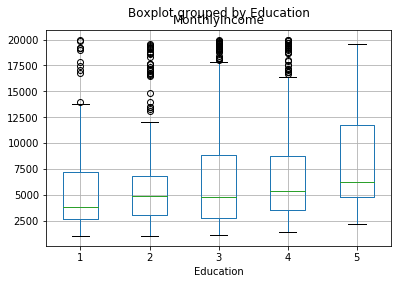

In [32]:
H.boxplot(column = 'MonthlyIncome', by = 'Education')

In [33]:
# from box plot, it confirms that mean of group 1 is significantly different than that of group 5.
# whereas group 2 and group 3 mean have not remarkable difference.

In [34]:
# Using 2 sample t-test we can check the variation between each of the two groups. Power of test will give the confidence.

In [38]:
F = pd.read_csv('fair_pay_data.csv',index_col = 0)
F.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [39]:
# Q. check whether the average salary is biased or not towards department level.
# here we can check avg salary with respect to job level also.

In [40]:
F['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [41]:
# H0: avg salary of Engg = sales = finance
# H1: at least any 2 are different.

In [42]:
F['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [49]:
F1 = F.groupby('job_level')
F1_Sal = F1.get_group('Salaried')
F1_Hour = F1.get_group('Hourly')
F1_Mgr = F1.get_group('Manager')

In [50]:
f_val, p_val = f_oneway(F1_Sal['salary'],F1_Hour['salary'],F1_Mgr['salary'])
p_val

0.0

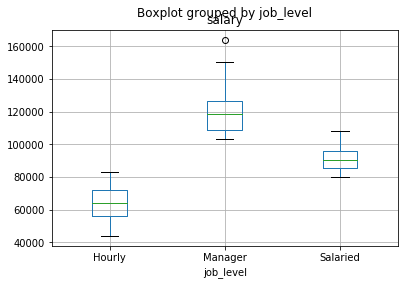

In [52]:
# very strong differentiation. As very small p-val.
# using two sample unpaired test, we can check the power of test.

In [54]:
shapiro(F1_Sal['salary'])

(0.9546260237693787, 1.6897491406098197e-08)

In [55]:
shapiro(F1_Hour['salary'])

(0.9713829159736633, 1.9065220864707133e-13)

In [56]:
# both the groups hourly and salried are not normal. hence non-parametric t-test. so using manwhitneyu

In [58]:
u_stat,p_val = mannwhitneyu(F1_Sal['salary'],F1_Hour['salary'])
print(p_val)

9.044609362547591e-164


In [59]:
n1=len(F1_Sal['salary'])
n2=len(F1_Hour['salary'])


In [60]:
delta=(np.mean(F1_Sal['salary']) - np.mean(F1_Hour['salary'])) / np.sqrt(((n1-1)*np.var(F1_Sal['salary'])+(n2-1)*np.var(F1_Hour['salary'])) / n1+n2-2)
delta


1.5123508936262076

In [61]:
print(ttest_power(delta, nobs=n1+n2, alpha=0.05, alternative='two-sided'))

1.0


In [ ]:
# hence power of test is 1, which means we are almost 100% confident over the test result (1-beta)